In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Tugas/dataset.csv', sep=';', encoding='utf-8')

df.head()

,userName,score,at,content,Label
0,Geni Yonvi,1,2022-11-13 22:33:33,Tolong aplikasi wa saya eror gk mau masuk kalo...,Negatif
1,Gadiza Anandita,1,2022-11-13 14:21:26,Aplikasi nya ga adil ini masa wa pacar saya ad...,Negatif
2,Aulia Zahro,2,2022-11-13 13:40:40,"saya kasih bintang 2, karena apa? karena skrg ...",Negatif
3,Adryan Bagus Pratama_01_8F,5,2022-11-13 13:34:21,"tolong sekali pihak WhatsApp yang terhormat, u...",Positif
4,anca bangka,1,2022-11-13 12:53:50,Semakin diupdate malah tambah banyak bug. urus...,Negatif


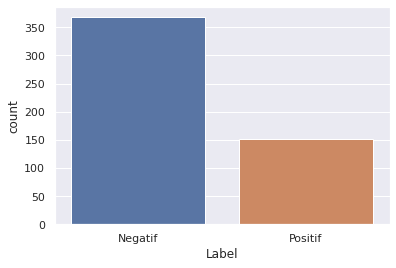

In [ ]:
sns.countplot(x='Label', data=df)

In [ ]:
df.drop(['userName', 'at', 'content'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Label'] = df.Label.astype("category").cat.codes

In [ ]:
categorical_col.remove('Label')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df.Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    264.0  99.0       1.0      363.0         363.0
_______________________________________________
Confusion Matrix: 
 [[264   0]
 [  0  99]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    104.0  52.0       1.0      156.0         156.0
_______________________________________________
Confusion Matrix: 
 [[104   0]
 [  0  52]]

